In [1]:
import poisson_atac as patac
import numpy as np
import anndata as ad

Global seed set to 0


In [2]:
import scanpy as sc

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))


In [13]:
def plot_region(adata_means_bin,adata_means_counts, region):
    fig, ax = plt.subplots(figsize=(8,8))
    x=pd.Series(adata_means_bin[:, region].X.squeeze()) #'chr1-9910003-9910914'
    y=pd.Series(adata_means_counts[:, region].X.squeeze())
    hue=adata_means_counts.obs.cell_type.reset_index(drop=True)
    sns.scatterplot(x=x, y=y, hue=hue)
    label_point(x, y, hue, ax)  
    ax.axis('equal')
    plt.xlabel('Binary mean across cells')
    plt.ylabel('Count mean across cells')
    plt.text(0.05, 0.95, f'Region: {region}', horizontalalignment='left',
             verticalalignment='center', transform=ax.transAxes)

# Compute means per celltype

In [4]:
data_path = '/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/data'
adata = patac.data.load_neurips(data_path=data_path, only_train=False, convert_counts = True)

In [5]:
adata_means_bin = np.array([adata[idx, :].X.mean(axis=0) for (key, idx) in adata.obs.groupby('cell_type').indices.items()]).squeeze()

In [6]:
adata_means_counts = np.array([adata[idx, :].layers['counts'].mean(axis=0) for (key, idx) in adata.obs.groupby('cell_type').indices.items()]).squeeze()

In [7]:
obs = pd.DataFrame({'cell_type': adata.obs.groupby('cell_type').indices.keys()})

In [8]:
adata_means_bin = ad.AnnData(X=np.array(adata_means_bin), obs=obs, var=adata.var)
adata_means_counts = ad.AnnData(X=np.array(adata_means_counts), obs=obs, var=adata.var)

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [16]:
var_bin = adata_means_bin.X.var(axis=0)
var_counts = adata_means_counts.X.var(axis=0)

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Variance of count mean')

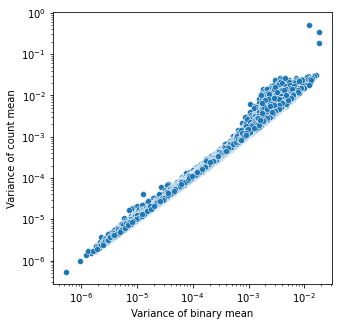

In [29]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(var_bin, var_counts)
ax.set(xscale="log", yscale="log")
#ax.axis('equal')
plt.xlabel('Variance of binary mean')
plt.ylabel('Variance of count mean')

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Variance of count mean')

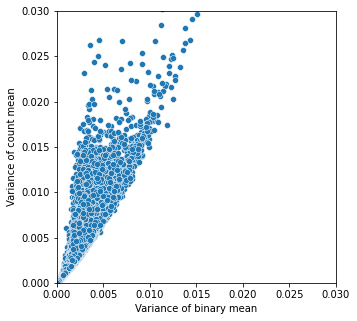

In [34]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(var_bin, var_counts)
#ax.set(xscale="log", yscale="log")
#ax.axis('equal')
plt.ylim(0, 0.03)
plt.xlim(0, 0.03)
plt.xlabel('Variance of binary mean')
plt.ylabel('Variance of count mean')

In [35]:
var_peaks = adata.var_names[np.where((var_bin < 0.005) & (var_counts > 0.02))[0]].values

In [36]:
var_peaks

array(['chr11-64778433-64779369', 'chr16-30370319-30371245',
       'chr19-38849908-38850786', 'chr19-44890335-44891339',
       'chr19-54136936-54137864', 'chr3-9396611-9397692',
       'chr7-100428148-100429888'], dtype=object)

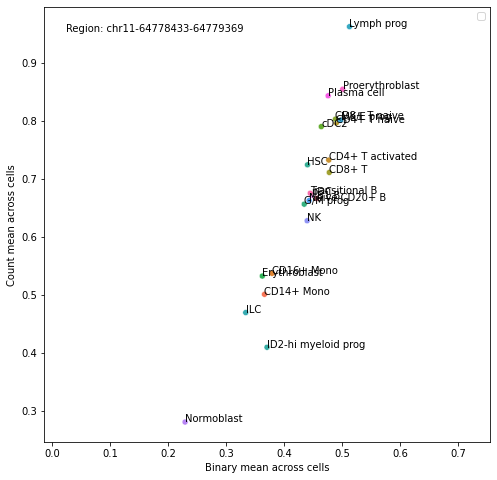

In [40]:
plot_region(adata_means_bin,adata_means_counts, var_peaks[0])
plt.legend('')

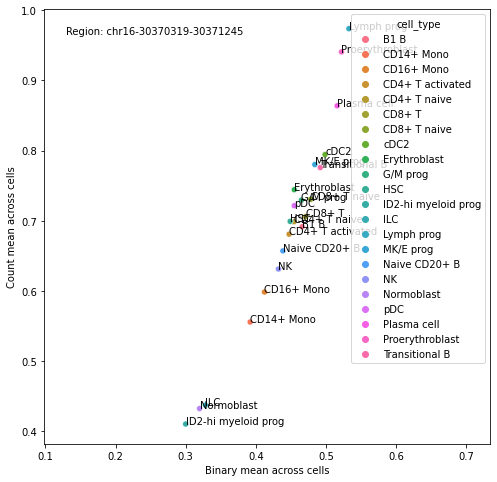

In [38]:
plot_region(adata_means_bin,adata_means_counts, var_peaks[1])

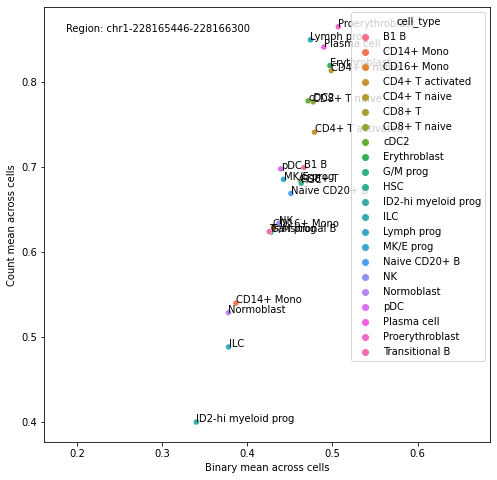

In [15]:
plot_region(adata_means_bin,adata_means_counts, var_peaks[2])

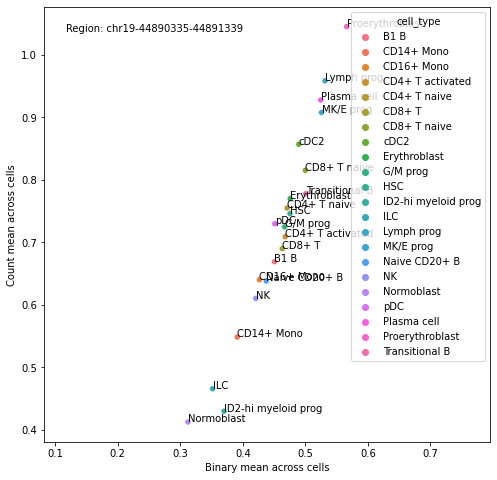

In [41]:
plot_region(adata_means_bin,adata_means_counts, var_peaks[3])

# Only T cells

In [42]:
adata_means_bin = adata_means_bin[adata_means_bin.obs.cell_type.isin(['CD4+ T activated',
 'CD4+ T naive',
 'CD8+ T',
 'CD8+ T naive'])]

In [43]:
adata_means_counts = adata_means_counts[adata_means_counts.obs.cell_type.isin(['CD4+ T activated',
 'CD4+ T naive',
 'CD8+ T',
 'CD8+ T naive'])]

In [44]:
var_bin = adata_means_bin.X.var(axis=0)
var_counts = adata_means_counts.X.var(axis=0)

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Variance of count mean')

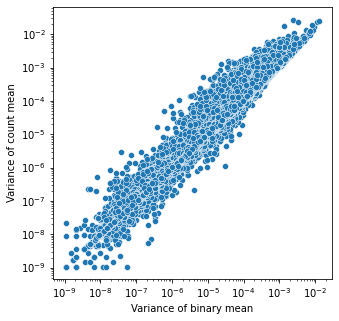

In [45]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(var_bin, var_counts)
ax.set(xscale="log", yscale="log")
#ax.axis('equal')
plt.xlabel('Variance of binary mean')
plt.ylabel('Variance of count mean')

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Variance of count mean')

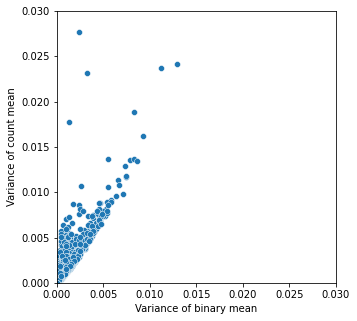

In [46]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(var_bin, var_counts)
#ax.set(xscale="log", yscale="log")
#ax.axis('equal')
plt.ylim(0, 0.03)
plt.xlim(0, 0.03)
plt.xlabel('Variance of binary mean')
plt.ylabel('Variance of count mean')

In [68]:
var_peaks = adata.var_names[np.where((var_bin < 0.005) & (var_counts > 0.01))[0]].values

In [69]:
var_peaks

array(['chr1-633515-634474', 'chr17-22520971-22521869',
       'chr19-12782066-12782987', 'chr3-93470137-93471048'], dtype=object)

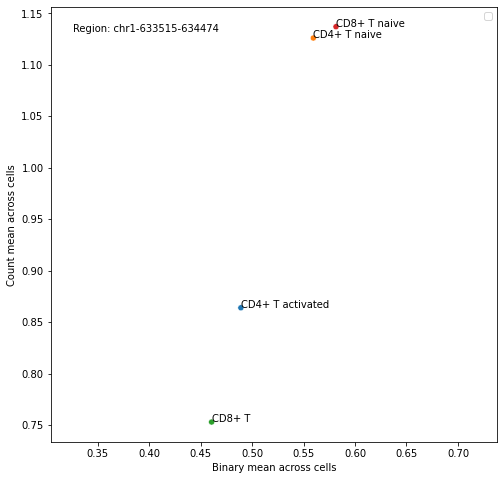

In [53]:
plot_region(adata_means_bin,adata_means_counts, var_peaks[0])
plt.legend('')

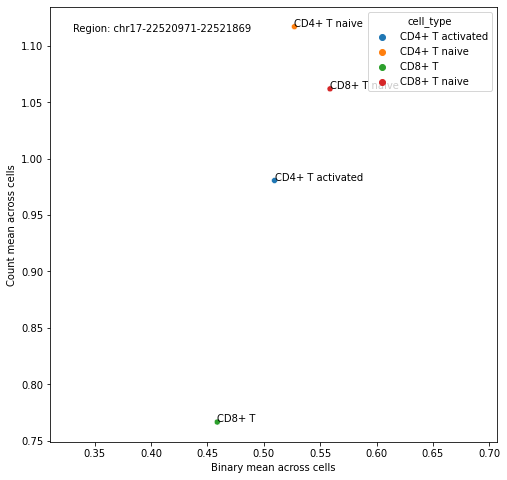

In [54]:
plot_region(adata_means_bin,adata_means_counts, var_peaks[1])

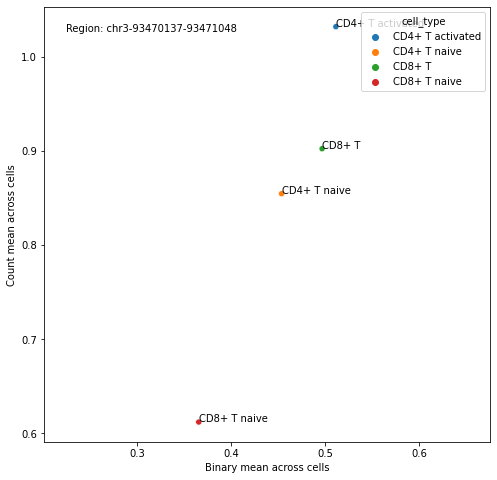

In [55]:
plot_region(adata_means_bin,adata_means_counts, var_peaks[2])

## Read in cellranger peak annotation

In [61]:
annotation = pd.read_csv('/lustre/groups/ml01/datasets/projects/20220323_neurips21_bmmc_christopher.lance/multiome/aggr_donors/atac_peak_annotation.tsv', sep = '\t')

In [65]:
annotation.index = annotation.chrom + '-' + annotation.start.astype(str) + '-' + annotation.end.astype(str)

In [70]:
annotation.loc[var_peaks]

,chrom,start,end,gene,distance,peak_type
chr1-633515-634474,chr1,633515,634474,AC114498.1,45887.0,distal
chr17-22520971-22521869,chr17,22520971,22521869,MTRNR2L1,-1242.0,distal
chr19-12782066-12782987,chr19,12782066,12782987,AC018761.3,2114.0,distal
chr3-93470137-93471048,chr3,93470137,93471048,NaN,NaN,intergenic


In [71]:
t_cell_markers  = {'CD4+ T activated': ['CD4', 'IL7R', 'TRBC2', 'ITGB1'],
    'CD4+ T naive': ['CD4', 'IL7R', 'TRBC2', 'CCR7'],
    'CD8+ T': ['CD8A', 'CD8B', 'GZMB', 'GZMA', 'CCL5', 'GZMK', 'GZMH', 'GZMA'],
    'T activation': ['CD69', 'CD38'], # CD69 much better marker!
    'T naive': ['LEF1', 'CCR7', 'TCF7']}

In [106]:
adata_means_bin[:,adata_means_bin.var_names.isin(region)]

View of AnnData object with n_obs × n_vars = 4 × 52
    obs: 'cell_type'
    var: 'feature_types'

In [97]:
regions=annotation[annotation.gene.isin(t_cell_markers['T naive'])]
region
sns.scatterplot(adata_means_bin[:,adata_means_bin.var_names.isin(region)].X.squeeze(), adata_means_counts[:,adata_means_bin.var_names.isin(region)].X.squeeze(), hue=adata_means_counts.obs.cell_type)
# plt.axis('equal')

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Per-column arrays must each be 1-dimensional

In [96]:
adata_means_bin[:,adata_means_bin.var_names.isin(region)]

View of AnnData object with n_obs × n_vars = 4 × 52
    obs: 'cell_type'
    var: 'feature_types'

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.011505240947008132,
 0.10876890048384666,
 0.011340847052633763,
 0.12699618767946957)

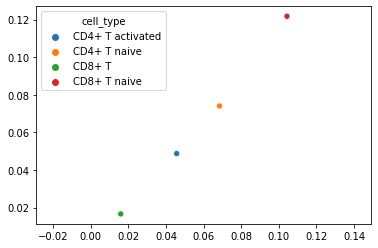

In [88]:
region='chr4-108168395-108169302'
sns.scatterplot(adata_means_bin[:,region].X.squeeze(), adata_means_counts[:,region].X.squeeze(), hue=adata_means_counts.obs.cell_type)
plt.axis('equal')

## ANother try

In [166]:
set(adata.obs.cell_type.unique())

{'B1 B',
 'CD14+ Mono',
 'CD16+ Mono',
 'CD4+ T activated',
 'CD4+ T naive',
 'CD8+ T',
 'CD8+ T naive',
 'Erythroblast',
 'G/M prog',
 'HSC',
 'ID2-hi myeloid prog',
 'ILC',
 'Lymph prog',
 'MK/E prog',
 'NK',
 'Naive CD20+ B',
 'Normoblast',
 'Plasma cell',
 'Proerythroblast',
 'Transitional B',
 'cDC2',
 'pDC'}

In [167]:
adata_tcell = adata[adata.obs.cell_type.isin(['CD4+ T activated',
 'CD4+ T naive',
 'CD8+ T',
 'CD8+ T naive'])]

In [168]:
adata_tcell

View of AnnData object with n_obs × n_vars = 20257 × 116490
    obs: 'nCount_peaks', 'atac_fragments', 'reads_in_peaks_frac', 'blacklist_fraction', 'nucleosome_signal', 'cell_type', 'pseudotime_order_ATAC', 'batch', 'pseudotime_order_GEX', 'is_train', 'size_factor'
    var: 'feature_types'
    uns: 'dataset_id', 'gene_activity_var_names', 'organism', 'sample_pm_varnames'
    obsm: 'gene_activity', 'lsi_full', 'lsi_red', 'umap'
    layers: 'counts'

In [196]:
adata_means_bin = np.array([adata_tcell[idx, :].X.mean(axis=0) for (key, idx) in adata_tcell.obs.groupby('cell_type').indices.items()]).squeeze()

In [197]:
adata_means_counts = np.array([adata_tcell[idx, :].layers['counts'].mean(axis=0) for (key, idx) in adata_tcell.obs.groupby('cell_type').indices.items()]).squeeze()

In [198]:
obs = pd.DataFrame({'cell_type': adata_tcell.obs.groupby('cell_type').indices.keys()})

In [199]:
adata_means_bin = ad.AnnData(X=np.array(adata_means_bin), obs=obs, var=adata_tcell.var)
adata_means_counts = ad.AnnData(X=np.array(adata_means_counts), obs=obs, var=adata_tcell.var)

/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [200]:
var_peaks = adata_tcell.var_names[np.all(adata_means_bin.X > 0.45, axis=0)]


In [206]:
adata_test = adata_tcell[:, var_peaks]

Trying to set attribute `._uns` of view, copying.


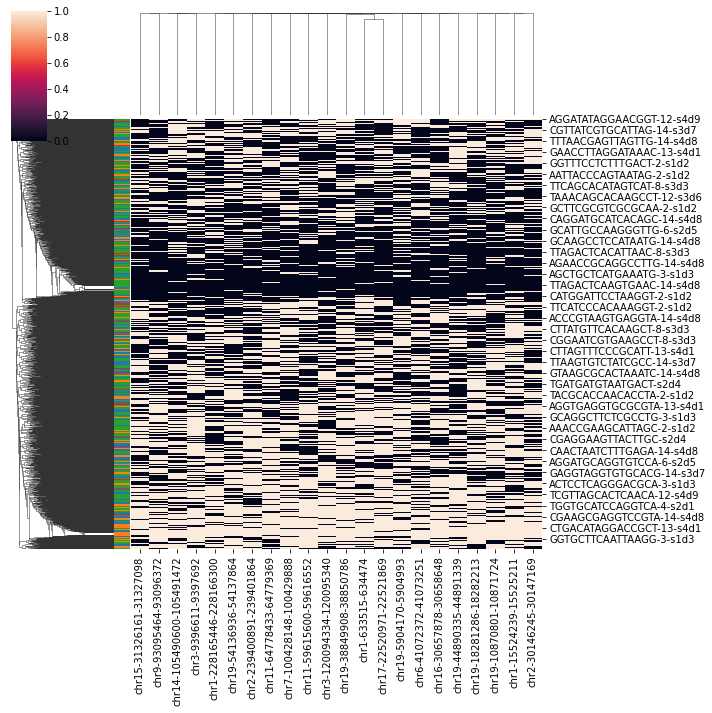

In [211]:
sc.pl.clustermap(adata_test, obs_keys='cell_type')

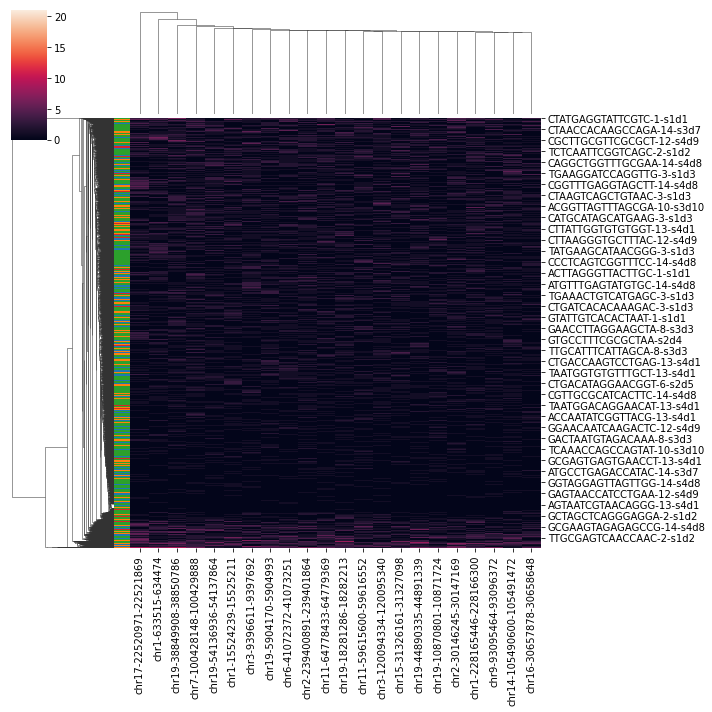

In [219]:
adata_test.X = adata_test.layers['counts']
sc.pl.clustermap(adata_test, obs_keys='cell_type')

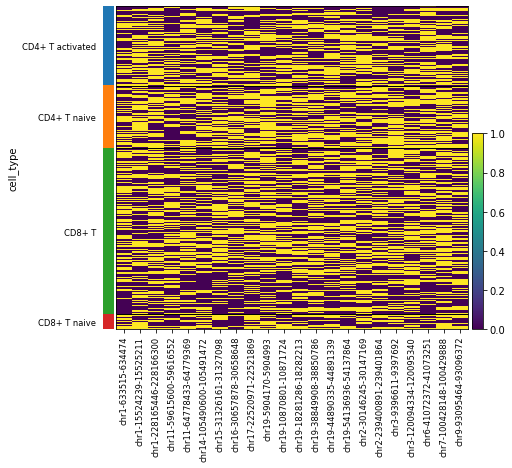

In [218]:
sc.pl.heatmap(adata_test, groupby='cell_type', var_names = adata_test.var_names)

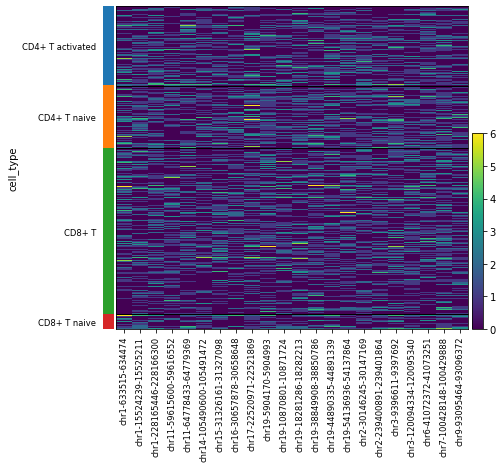

In [216]:
sc.pl.heatmap(adata_test, groupby='cell_type', var_names = adata_test.var_names, layer='counts', vmax=6)

In [201]:
var_peaks

Index(['chr1-633515-634474', 'chr1-15524239-15525211',
       'chr1-228165446-228166300', 'chr11-59615600-59616552',
       'chr11-64778433-64779369', 'chr14-105490600-105491472',
       'chr15-31326161-31327098', 'chr16-30657878-30658648',
       'chr17-22520971-22521869', 'chr19-5904170-5904993',
       'chr19-10870801-10871724', 'chr19-18281286-18282213',
       'chr19-38849908-38850786', 'chr19-44890335-44891339',
       'chr19-54136936-54137864', 'chr2-30146245-30147169',
       'chr2-239400891-239401864', 'chr3-9396611-9397692',
       'chr3-120094334-120095340', 'chr6-41072372-41073251',
       'chr7-100428148-100429888', 'chr9-93095464-93096372'],
      dtype='object')

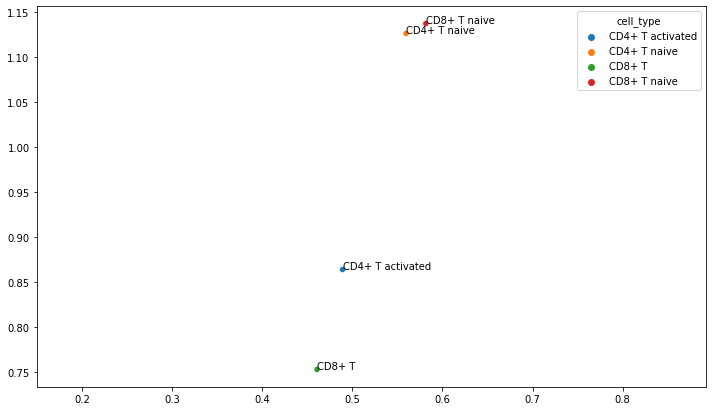

In [202]:
plot_region(adata_means_bin,adata_means_counts, var_peaks[0])

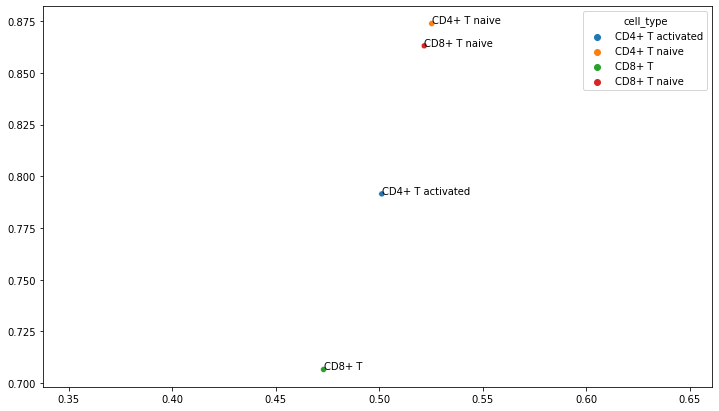

In [203]:
plot_region(adata_means_bin,adata_means_counts, var_peaks[1])

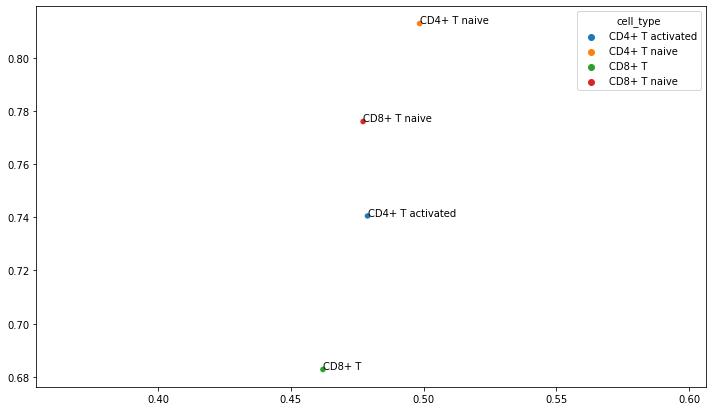

In [204]:
plot_region(adata_means_bin,adata_means_counts, var_peaks[2])

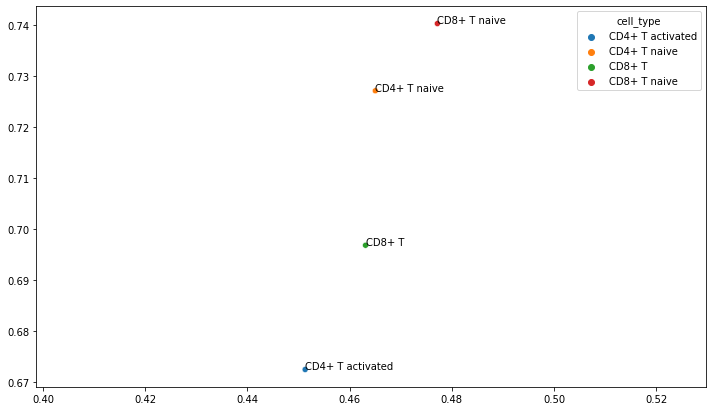

In [205]:
plot_region(adata_means_bin,adata_means_counts, var_peaks[3])

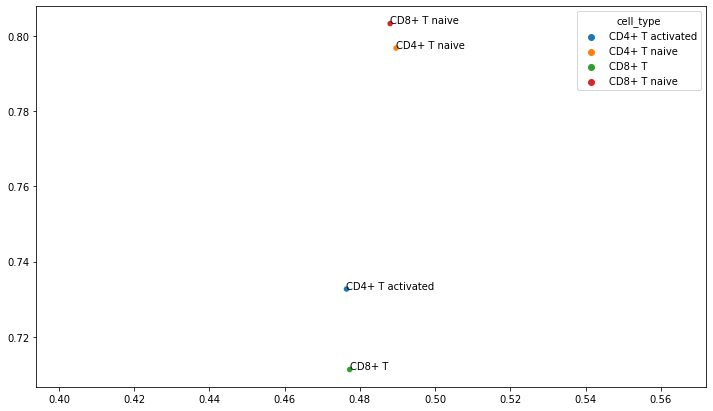

In [220]:
plot_region(adata_means_bin,adata_means_counts, var_peaks[4])

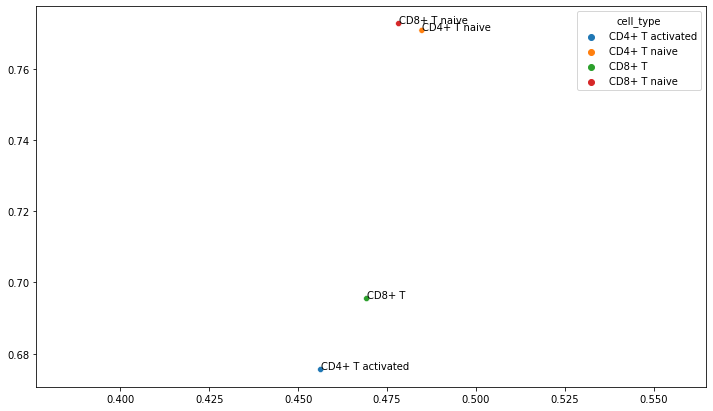

In [221]:
plot_region(adata_means_bin,adata_means_counts, var_peaks[5])

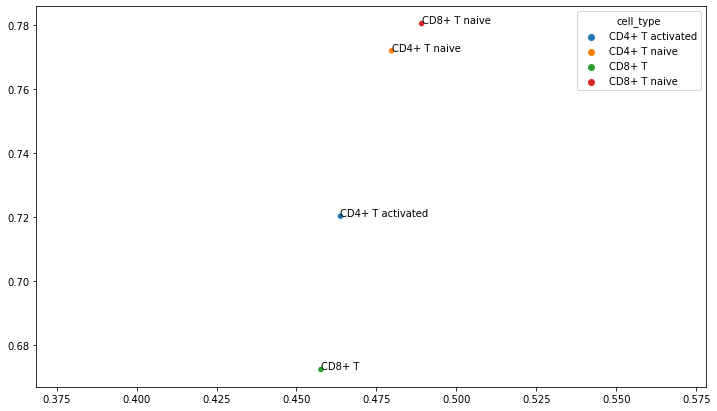

In [222]:
plot_region(adata_means_bin,adata_means_counts, var_peaks[6])

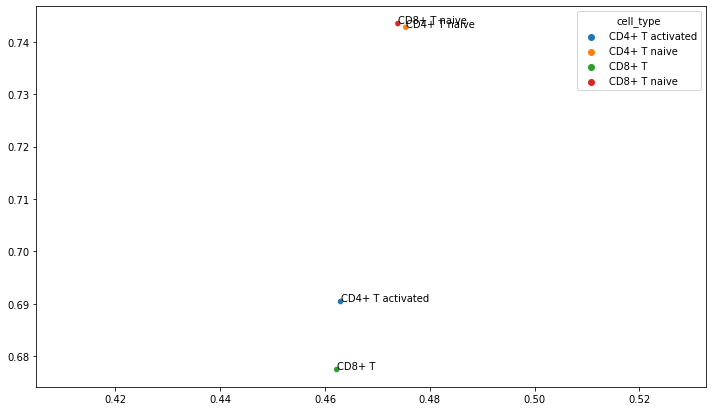

In [223]:
plot_region(adata_means_bin,adata_means_counts, var_peaks[7])

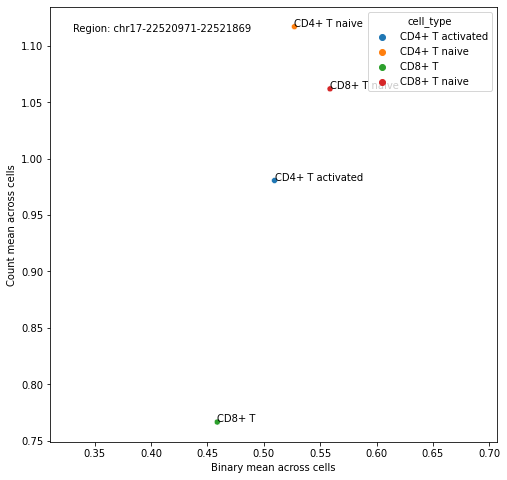

In [238]:
plot_region(adata_means_bin,adata_means_counts, var_peaks[8])